In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 

**Описание данных:**

*age*: возраст

*sex*: пол женский/мужской

*bmi*: индекс массы тела

*children*: количество детей, входящих в страховку/иждивенцов

*smoker*: курящий/не курящий

*region*: район проживания в США, северо-восток, юго-восток, юго-запад, северо-запад.

*charges*: расходы по страховке

In [3]:
# загрузим датасет
df = pd.read_csv('23.2 insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
# создадим функцию визуализации данных 
def show_age_charges(df):
    plt.plot(df['age'], df.charges, 'ro') 
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.title('Зависимость стоимости страховки от возраста')
    plt.show()

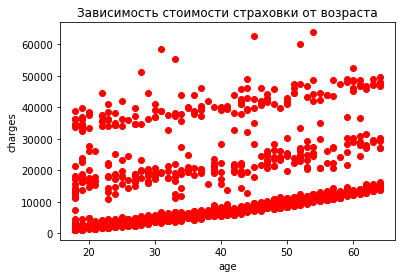

In [38]:
show_age_charges(df)

In [56]:
# отберем в новый датафрейм клиентов женщин, без детей и с расходами менее 15000
df_new = df[(df.children==0) & (df.charges < 15000) & (df.sex == 'female')]
df_new.shape

(228, 7)

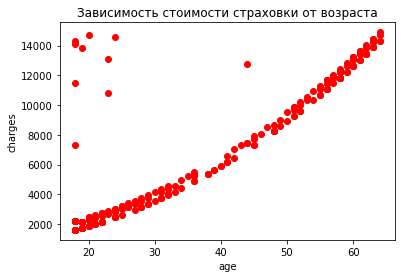

In [57]:
show_age_charges(df_new)

In [58]:
# разделим этот датафрейм на треноровочную и тестовую выборку
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

In [59]:
# выведим первые пять строк
train.head()

,age,sex,bmi,children,smoker,region,charges
895,61,female,44.000,0,no,southwest,13063.88300
333,56,female,28.785,0,no,northeast,11658.37915
973,19,female,40.500,0,no,southwest,1759.33800
400,51,female,20.600,0,no,southwest,9264.79700
989,24,female,20.520,0,yes,northeast,14571.89080


In [60]:
# импортируем модуль для обучения модели линнейной регрессии
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [61]:
# проведем обучение модели по одному признаку-фиче 'age'
lr.fit(train[['age']], train.charges)

LinearRegression()

MAE (mean absolute error)

рассчитывается как среднее абсолютных разностей между целевыми значениями и предиктами.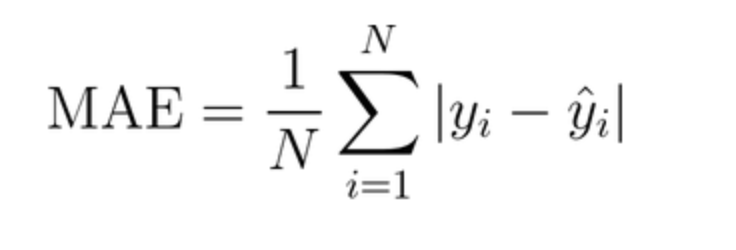

Пример:

true = [0, 100, 200]

pred = [0, 50, 250]

MAE = (0 + 50 + 50)/3 = 33,3

In [62]:
true = [0, 100, 200]
pred = [0, 50, 250]

In [63]:
# импортируем модуль для расчета МАЕ
from sklearn.metrics import mean_absolute_error
mean_absolute_error(true, pred)

33.333333333333336

In [64]:
# рассчитаем МАЕ
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

1556.1082486960813

In [82]:
# удалим значения, где charges >= 6000 и age<50
indx = df_new[(df_new.charges >= 6000) & (df_new.age<50)].index # сохраним индексы знычений, 
                                                                # где charges >= 6000 и age<50
print(df_new.shape)
df_new = df_new.drop(indx) # удалим значения, где charges >= 6000 и age<50
print(df_new.shape)

(197, 7)
(197, 7)


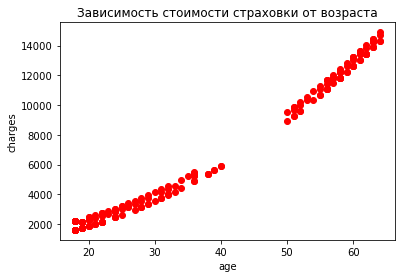

In [83]:
show_age_charges(df_new)

In [67]:
# разделим этот датафрейм на треноровочную и тестовую выборку
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

# проведем обучение модели по одному признаку-фиче 'age'
lr.fit(train[['age']], train.charges)

# рассчитаем МАЕ
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

422.38443437781444